# Linear model analysis

In [1]:
# import relevant module
import openturns as ot
import otpod
# enable display figure in notebook
%matplotlib inline

## Generate data

In [2]:
N = 100
ot.RandomGenerator.SetSeed(123456)
defectDist = ot.Uniform(0.1, 0.6)
# normal epsilon distribution
epsilon = ot.Normal(0, 1.9)
defects = defectDist.getSample(N)
signalsInvBoxCox = defects * 43. + epsilon.getSample(N) + 2.5
# Inverse Box Cox transformation
invBoxCox = ot.InverseBoxCoxTransform(0.3)
signals = invBoxCox(signalsInvBoxCox)

## Run analysis without Box Cox

In [3]:
analysis = otpod.UnivariateLinearModelAnalysis(defects, signals)

## Get some particular results

In [4]:
print(analysis.getIntercept())
print(analysis.getR2())
print(analysis.getKolmogorovPValue())

[Intercept for uncensored case : -604.758]
[R2 for uncensored case : 0.780469]
[Kolmogorov p-value for uncensored case : 0.803087]


## Print all results of the linear regression and all tests on the residuals

A warning is printed because some residuals tests failed : the p-value is less than 0.5.

In [5]:
print(analysis.getResults())

--------------------------------------------------------------------------------
         Linear model analysis results
--------------------------------------------------------------------------------
Box Cox parameter :                               Not enabled              
                                                                           
                                                   Uncensored              
                                                                           
Intercept coefficient :                               -604.76              
Slope coefficient :                                   3606.04              
Standard error of the estimate :                       291.47              
                                                                           
Confidence interval on coefficients                                        
Intercept coefficient :                         [-755.60, -453.91]              
Slope coefficient :               

## Show graphs
### The linear model is not correct

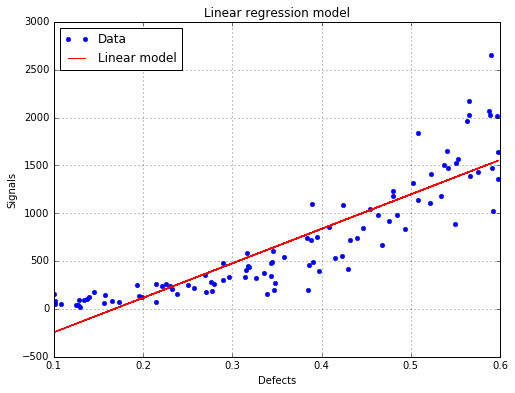

In [7]:
fig, ax = analysis.drawLinearModel()
fig.show()

### The residuals are not homoskedastic

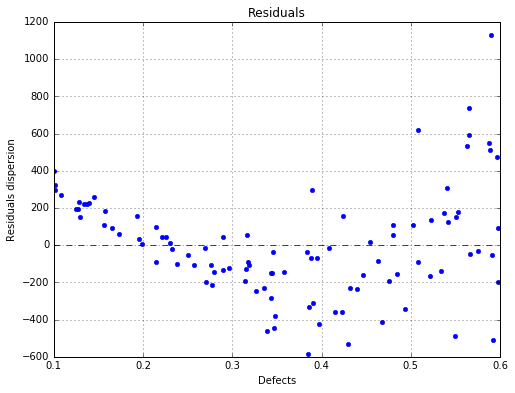

In [8]:
fig, ax = analysis.drawResiduals()
fig.show()

## Run analysis with Box Cox

In [9]:
analysis = otpod.UnivariateLinearModelAnalysis(defects, signals, boxCox=True)

## Print results of the linear regression and all tests on the residuals

In [10]:
print(analysis.getResults())

--------------------------------------------------------------------------------
         Linear model analysis results
--------------------------------------------------------------------------------
Box Cox parameter :                                      0.22              
                                                                           
                                                   Uncensored              
                                                                           
Intercept coefficient :                                  4.02              
Slope coefficient :                                     25.55              
Standard error of the estimate :                         1.34              
                                                                           
Confidence interval on coefficients                                        
Intercept coefficient :                          [3.33, 4.72]              
Slope coefficient :                    

## Save all results in a csv file

In [11]:
analysis.saveResults('results.csv')

## Show graphs
### The linear regression model with data

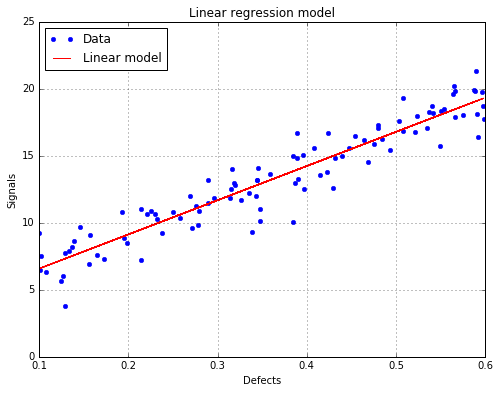

In [12]:
fig, ax = analysis.drawLinearModel(name='figure/linearModel.png')
# The figure is saved as png file
fig.show()

### The residuals with respect to the defects

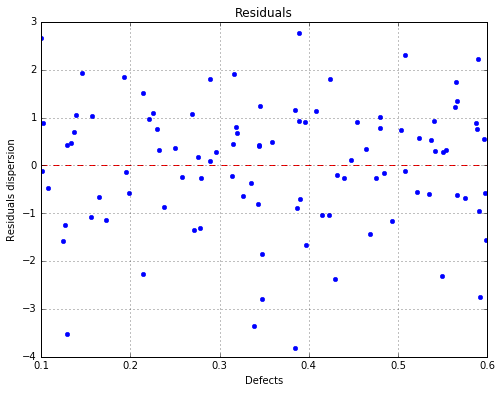

In [13]:
fig, ax = analysis.drawResiduals(name='figure/residuals.eps')
# The figure is saved as eps file
fig.show()

### The fitted residuals distribution with the histogram

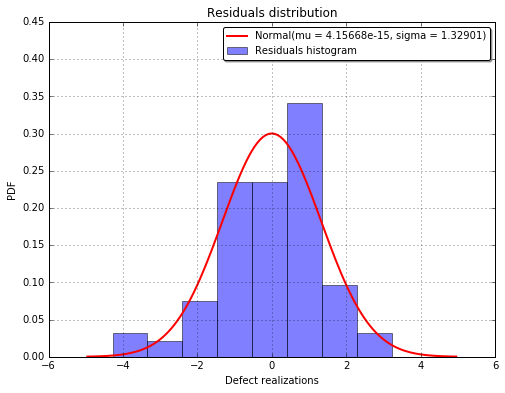

In [14]:
fig, ax = analysis.drawResidualsDistribution()
ax.set_ylim(ymax=0.45)
fig.show()
# The figure is saved after the changes
fig.savefig('figure/residualsDistribution.png', bbox_inches='tight')

### The residuals QQ plot

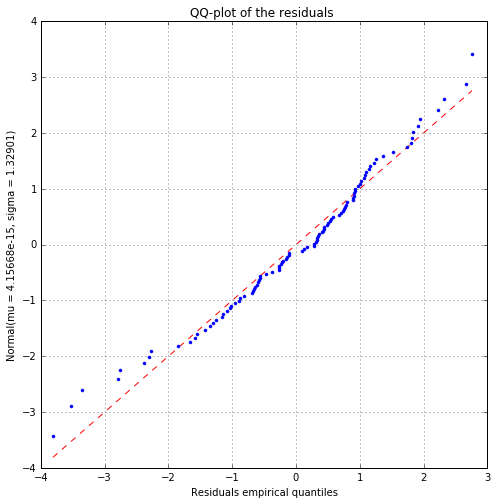

In [15]:
fig, ax = analysis.drawResidualsQQplot()
fig.show()

### The Box Cox likelihood with respect to the defect

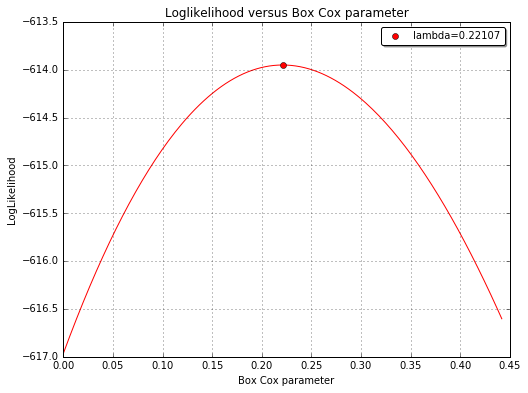

In [16]:
fig, ax = analysis.drawBoxCoxLikelihood(name='figure/BoxCoxlikelihood.png')
fig.show()